In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [26]:
class Perceptron:
  def __init__(self,learning_rate=0.1):
    self.learning_rate = learning_rate
    self.b=0.0
    self.w=None
    self.misclassified_samples=[]

  def fit(self,x:np.array,y:np.array,n_iter=10):
    self.b=0.0;
    self.w=np.zeros(x.shape[1])
    self.misclassified_samples=[]

    for _ in range(n_iter):
      errors=0
      for xi,yi in zip(x,y):
        update = self.learning_rate*(yi-self.predict(xi))
        self.b+=update
        self.w+=update*xi
        errors+=int(update!=0.0)
      self.misclassified_samples.append(errors)

  def f(self,x:np.array)->float:
    return np.dot(x,self.w)+self.b

  def predict(self,x:np.array):
    return np.where(self.f(x)>= 0,1,-1)


In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

In [ ]:
df=pd.read_csv(url,header=None)
print(df.head())

     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa


In [ ]:
df.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [17]:
y=df.iloc[:,4].values
x=df.iloc[:,0:3].values

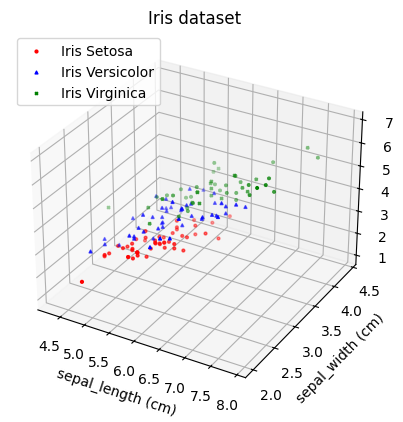

In [18]:
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.set_title("Iris dataset")
ax.set_xlabel("sepal_length (cm)")
ax.set_ylabel("sepal_width (cm)")
ax.set_zlabel("petal_length (cm)")
ax.scatter(x[:50, 0], x[:50, 1], x[:50, 2], color='red', marker='o', s=4, label="Iris Setosa")
ax.scatter(x[50:100,0],x[50:100,1],x[50:100,2],color='blue',marker='^',s=4,label="Iris Versicolor")
ax.scatter(x[100:150,0],x[100:150,1],x[100:150,2],color='green',marker='x',s=4,label="Iris Virginica")
plt.legend(loc='upper left')
plt.show()

In [19]:
x=x[0:100,0:2]
y=y[0:100]

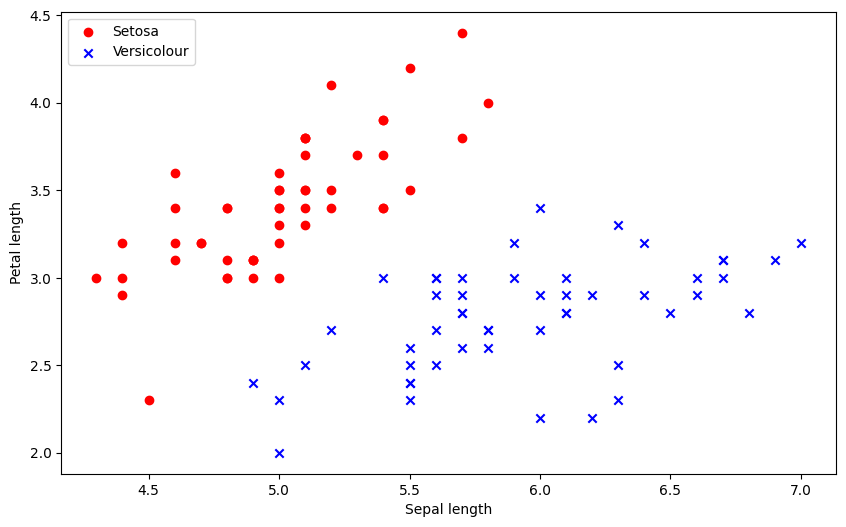

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(x[:50, 0], x[:50, 1], color='red', marker='o', label='Setosa')
plt.scatter(x[50:100, 0], x[50:100, 1], color='blue', marker='x', label='Versicolour')
plt.xlabel("Sepal length")
plt.ylabel("Petal length")
plt.legend(loc='upper left')
plt.show()

In [21]:
y=np.where(y=='Iris-setosa',1,-1)
x[:,0] = (x[:,0]-x[:,0].mean())/x[:,0].std()
x[:,1] = (x[:,1]-x[:,1].mean())/x[:,1].std()

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [27]:
classifier = Perceptron(learning_rate=0.01)
classifier.fit(x_train,y_train)

In [28]:
print("Accuracy:", accuracy_score(classifier.predict(x_test), y_test) * 100)

Accuracy: 100.0


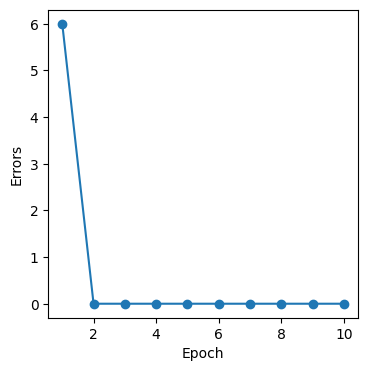

In [29]:
plt.figure(figsize=(4, 4))
plt.plot(range(1, len(classifier.misclassified_samples) + 1), classifier.misclassified_samples, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Errors')
plt.show()